In [9]:
import ctypes
import _ctypes
import numpy as np
from numpy.ctypeslib import ndpointer

In [10]:
# import c coded functions from dll
# make sure to have 64bit dll for 64bit python
lib = ctypes.cdll.LoadLibrary("C://Users//wack//Dropbox//forc.1//src//x64//Debug//forc.dll")
fitPolySurface = lib.fitPolySurface
# tell python about function properties to make function calls intuitiv
fitPolySurface.restype = None
fitPolySurface.argtypes = [ndpointer(ctypes.c_double, flags="contiguous"), 
                           ndpointer(ctypes.c_double, flags="contiguous"), 
                           ndpointer(ctypes.c_double, flags="contiguous"),
                           ctypes.c_size_t,
                           ndpointer(ctypes.c_double, flags="contiguous"),
                           ctypes.c_char_p]

convHaHb2HcHu = lib.convHaHb2HcHu
convHaHb2HcHu.restype = None
convHaHb2HcHu.argtypes = [ndpointer(ctypes.c_double, flags="contiguous"), 
                           ndpointer(ctypes.c_double, flags="contiguous"), 
                           ctypes.c_size_t,
                           ndpointer(ctypes.c_double, flags="contiguous, writeable"),
                           ndpointer(ctypes.c_double, flags="contiguous, writeable")]

calculateFORCHcHuFit = lib.calculateFORCHcHuFit
calculateFORCHcHuFit.restype = None
calculateFORCHcHuFit.argtypes = [ndpointer(ctypes.c_double, flags="contiguous"), 
                                 ndpointer(ctypes.c_double, flags="contiguous"), 
                                 ndpointer(ctypes.c_double, flags="contiguous"), 
                                 ctypes.c_size_t,
                                 ctypes.c_size_t,
                                 ndpointer(ctypes.c_double, flags="contiguous, writeable"),
                                 ctypes.c_int]

In [11]:
# create some test data
cdim, udim = 8,9
vc = np.linspace(-cdim, cdim, cdim*2+1)
vu = np.linspace(-udim, udim, udim*2+1)
rc, ru = np.meshgrid( vc, vu)
rm = np.empty( (udim*2+1, cdim*2+1), dtype=np.double)
rm[:] = np.nan
for c in range(cdim*2+1):
    for u in range(udim*2+1):
        if(u<c): rm[u,c] = u+(c*.05)
rc.shape, ru.shape, rm.shape, rm     

((19, 17),
 (19, 17),
 (19, 17),
 array([[   nan,   0.05,   0.1 ,   0.15,   0.2 ,   0.25,   0.3 ,   0.35,
           0.4 ,   0.45,   0.5 ,   0.55,   0.6 ,   0.65,   0.7 ,   0.75,
           0.8 ],
        [   nan,    nan,   1.1 ,   1.15,   1.2 ,   1.25,   1.3 ,   1.35,
           1.4 ,   1.45,   1.5 ,   1.55,   1.6 ,   1.65,   1.7 ,   1.75,
           1.8 ],
        [   nan,    nan,    nan,   2.15,   2.2 ,   2.25,   2.3 ,   2.35,
           2.4 ,   2.45,   2.5 ,   2.55,   2.6 ,   2.65,   2.7 ,   2.75,
           2.8 ],
        [   nan,    nan,    nan,    nan,   3.2 ,   3.25,   3.3 ,   3.35,
           3.4 ,   3.45,   3.5 ,   3.55,   3.6 ,   3.65,   3.7 ,   3.75,
           3.8 ],
        [   nan,    nan,    nan,    nan,    nan,   4.25,   4.3 ,   4.35,
           4.4 ,   4.45,   4.5 ,   4.55,   4.6 ,   4.65,   4.7 ,   4.75,
           4.8 ],
        [   nan,    nan,    nan,    nan,    nan,    nan,   5.3 ,   5.35,
           5.4 ,   5.45,   5.5 ,   5.55,   5.6 ,   5.65,   5.7 ,   5.75,
 

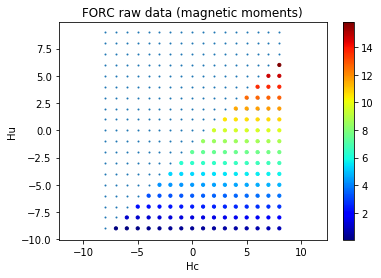

In [12]:
import matplotlib.pyplot as plt
plt.scatter(rc, ru, s=1)
plt.scatter(rc, ru, s=10, c=rm, cmap=plt.cm.get_cmap("jet"))
plt.colorbar()
plt.xlabel( 'Hc')
plt.ylabel( 'Hu')
plt.title('FORC raw data (magnetic moments)')
plt.axis('equal')
plt.show()

In [ ]:
FORC = np.empty_like( rm)
calculateFORCHcHuFit( rc, ru, rm, rm.shape[1], rm.shape[0], FORC, 1)

%timeit calculateFORCHcHuFit( rx, ry, rz, 100, 100, FORC, 3) -> 10 pts

21.4 s ± 877 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

on Toshiba Z930-16k (core i5, single thread)

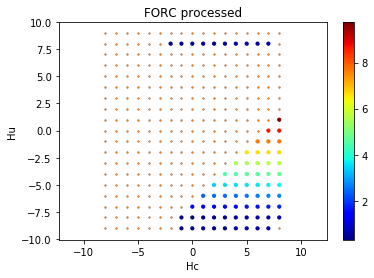

In [7]:
plt.scatter(rc, ru, s=1)
plt.scatter(rc, ru, s=10, c=FORC, cmap=plt.cm.get_cmap("jet"))
plt.colorbar()
plt.xlabel( 'Hc')
plt.ylabel( 'Hu')
plt.title('FORC processed')
plt.axis('equal')
plt.show()

In [502]:
FORC

array([[  nan,   nan,   nan,   nan,   nan,   nan,   nan,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,  1.35,
         1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,  2.7 ,  2.75],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,  3.45,  3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,  5.55,  5.6 ,  5.65,  5.7 ,  5.75],
       [  nan,   nan,   nan,   nan,   nan,   nan

In [375]:
# Simple FORC plotter, convolution based
# written by Michael Wack 2014-2017
# under development

import numpy as np
from numpy.random import uniform
#import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.mlab import griddata
from scipy import ndimage, interpolate
import timeit
import io
#from scipy.interpolate import griddata
#import scipy

import pandas as pd

'''
def fitPolySurface( x, y, z):
    v = np.array([np.ones(len(x)), x, y, x**2, y**2, x*y])


    # workaround for numpy nan bug
    idx = ~np.isnan(z)

    if ~np.any(idx):
        #print("all nan, not fitting")
        return [0, 0, 0, 0, 0, 0], 0, 0, 0
    else:
        #print(np.squeeze(v[:,idx].T, axis=1))
        #print(idx)
        #print(v[:,idx].shape)
        return np.linalg.lstsq(v[:,idx].T, z[idx])

    # numpy bug for nan values
    #return np.linalg.lstsq(v.T, z)
'''

def FastImportFORCData(filename, dialect='micromag'):
    f = open(filename)

    hys_df = None
    msi_df = None

    inc_hysloop = False
    inc_msi = False

    if dialect=='micromag':
        # important to check if those are declared in the header
        # in this case those must be treated/removed before the forc data

        cl = 0  # current line number

        for line in f:
            cl += 1 # increase current line number count
            if "".join(line.split()).startswith('Includeshysteresisloop?Yes'):
                inc_hysloop = True
                print('hysteresis loop declared in header line {}'.format(cl))
            elif "".join(line.split()).startswith('IncludesMsi(H)?Yes'):
                inc_msi = True
                print('msi branch declared in header line {}'.format(cl))
            elif "".join(line.split()).startswith('FieldMoment'): # this marks beginning of data for Munich files (new micromag format?)
                print('data header (new format) detected in line {}'.format(cl))
                break # we are done with header lines
            elif "".join(line.split()).startswith('NData'): # this is end of header resp. beginning of data for forcopedia fiels (old micromag format?)
                print('data header (old format) detected in line {}'.format(cl))
                break # we are done with header lines

    #elif dialect=='vftb':
    #    # just skip 34 lines
    #    for i in range(34):
    #        f.readline()
    else:
        raise Exception("unknown dialect")

    # start reading data into pandas data frame
    # chunks of data separated by blank lines
    # skip 1st and last 2 lines from file
    fdf = pd.read_csv(io.StringIO("".join(f.readlines()[1:-2])), skip_blank_lines=False, header=None, names=['Field', 'Moment'],
                      dtype=np.float, index_col=False)
    f.close()  # done with reading from file

    fdf["segment"] = fdf.isnull().all(axis=1).cumsum()  # label chunks separated by NAN = empty line
    fdf = fdf.dropna()  # remove empty lines

    if inc_hysloop: # if hysteresis loop is included in data set
        # -> throw away first drift chunk (chunk_no == 0) and move the next two (chunk_no == 1 & 2) to hysteresis_df
        hys_df = fdf[fdf.segment.isin([1,2])]  # copy upfield and downfield hysteresis segment to hys_df
        fdf = fdf[fdf.segment >= 3]  # drop first three segments (Ms & hysteresis up and downfield)

    if inc_msi:
        msi_df = fdf[fdf.segment == fdf.segment.min()+1]  # copy msi segment to hys_df
        fdf = fdf[fdf.segment > fdf.segment.min()+1]  # drop msi segment from forc data


    # forc data fdf consists of alternating single Ms (drift) values and forc curves as segments
    #print(fdf)

    # separate forc and Ms data
    drift_df = fdf[fdf.segment.isin(range(fdf.segment.min(), fdf.segment.max(), 2))].copy()  # get every second segment as drift data
    forc_df = fdf[fdf.segment.isin(range(fdf.segment.min()+1, fdf.segment.max(), 2))].copy()  # get every other segment as forc curve

    forc_df.rename(columns={'Field': 'Hb'}, inplace=True)  # rename column "Field" to "Hb"

    # also return hysteresis and msi?
    return drift_df, forc_df

def DriftCorrection( forc_df, drift_df, polyorder=6):
    '''Do drift correction of forc data based on drift data'''

    # add segment steps needed for drift correction
    forcs = forc_df.groupby('segment')

    def SegStep(group):
        group['segstep'] = np.linspace(group['segment'].iloc[0], group['segment'].iloc[0] + 2, num=len(group),
                                       endpoint=False)
        return group

    forc_df = forcs.apply(SegStep)  # add decimal segment steps for each point - needed for drift correction

    # lets look at the drift data
    y = drift_df['Moment']
    x = drift_df['segment']  # segment numbers
    driftpoly = np.poly1d(np.polyfit(x, y, polyorder))  # fit polynomial to the data

    plt.plot(x, y, 'r.')
    p = plt.plot(x, driftpoly(x), 'g-')

    # apply drift correction
    # (see Variforc, Egli 2013, eq 23)
    forc_df['Moment'] *= driftpoly(1) / driftpoly(forc_df['segstep'])

    # return plot
    return forc_df

def PrepareForcData(forc_df, mirror=True):
    # add column Ha (first Hb of each FORC)
    def Ha(group):
        group['Ha'] = group['Hb'].iloc[0]
        return group

    forcs = forc_df.groupby('segment')
    forc_df = forcs.apply(Ha)  # adding Ha slow!

    forcs = forc_df.groupby('segment')

    if mirror:  # mirror each FORC curve # mirroring slow
        def mirror_forc(group):
            mirrored_group = group.copy()  # do not mirror first point since identical
            mirrored_group['segment'] = -group['segment']
            mirrored_group['Hb'] = 2 * group['Ha'] - group['Hb']  # could be done on whole data frame -> faster?
            mirrored_group['Moment'] = 2 * group['Moment'].iloc[0] - group['Moment']
            return pd.concat([mirrored_group.iloc[:0:-1], group])

        forc_df = forcs.apply(mirror_forc)

    # Halen is number of groups
    Halen = len(forcs)
    # Hblen is maximum length of a group
    Hblen = forcs.size().max()

    return forc_df, Halen, Hblen

def PlotForcCurves( forc_df):
    # plot for testing
    for key, grp in forc_df.groupby('segment'):
        plt.plot(grp['Hb'], grp['Moment'], label="FORC {}".format(key))
    plt.show()


def FastTranslateHaHbHcHu( HaHbdata):
    ''' translate from Ha,Hb coordinates into common Hu,Hc coordinates'''
    # Hu = (Ha+Hb) / 2
    # Hc = (Hb-Ha) / 2
    return np.array([(HaHbdata[:,1]-HaHbdata[:,0])/2, (HaHbdata[:,0]+HaHbdata[:,1])/2, HaHbdata[:,2]]).T

In [376]:
np.set_printoptions(threshold=np.nan)
dialect='micromag'
#fname = 'FeNi100-A-a-24-M001_005.forc'
#fname = 'FeNi0_heated.forc'  # big ~70k points
#fname = '140401-Gd2O3_2.forc'
#fname = "forcopedia/1256D-4R-2-062-25mg-250c.frc"
#fname = "forcopedia/1256D-49R-2-099b.frc"
#fname = "forcopedia/Bjurbole-L1i3-grad0.1.frc"
#fname = "forcopedia/Karoonda-10d.frc"
#fname = 'vftb_forc.frc'#; dialect = 'vftb'  # first vftb forc
fname = 'data//vftb_full_forc.frc'

initial_time = timeit.default_timer()

start_time = timeit.default_timer()
print("starting data import from {} at {}s".format( fname, start_time - initial_time))
dd, fd = FastImportFORCData(fname, dialect=dialect)
print("Seconds for importFORCdata: {}".format( timeit.default_timer() - start_time ))
print("Number of datapoints: {}".format(len(fd)))

starting data import from data//vftb_full_forc.frc at 5.2456383855314925e-05s
data header (old format) detected in line 33
Seconds for importFORCdata: 0.02108689628130378
Number of datapoints: 3320


In [377]:
#fd = DriftCorrection(fd, dd) # do drift correction

In [378]:
fd, Halen, Hblen = PrepareForcData(fd, mirror=False) # add Ha column, pot. mirror data

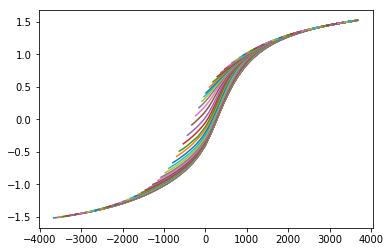

In [379]:
PlotForcCurves(fd)

In [380]:
#convert to Hc Hu
Ha = np.array(fd['Ha'])
Hb = np.array(fd['Hb'])
M = np.array(fd['Moment'])
Hc = np.empty(len(Ha), dtype=np.double)
Hu = np.empty(len(Hb), dtype=np.double)
# call dll function
convHaHb2HcHu( Ha, Hb, len(Ha), Hc, Hu)
#call python function for comparision - is identical
#ft = FastTranslateHaHbHcHu( np.vstack((Ha,Hb,M)).T)
#Hcp = ft[:,0]
#Hup = ft[:,1]

In [381]:
len(Hc), len(Hu)

(3320, 3320)

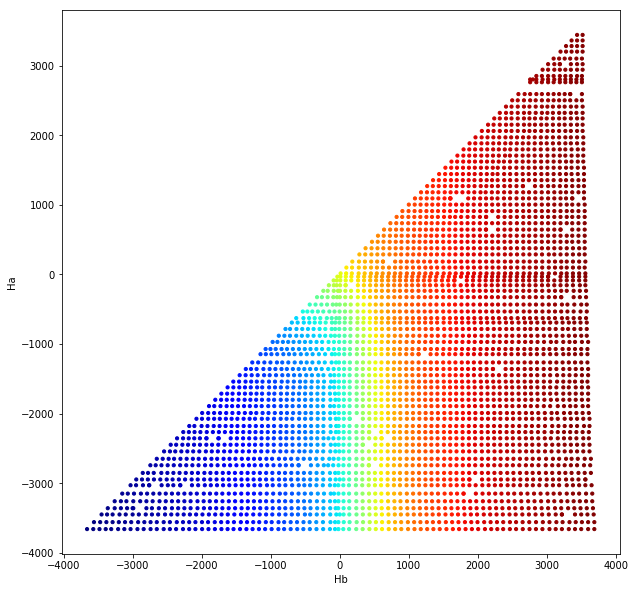

In [382]:
plt.figure(figsize=(10,10))
plt.scatter(Hb, Ha, s=10, c=M, cmap=cm.jet)
plt.xlabel( 'Hb')
plt.ylabel( 'Ha')
plt.show()

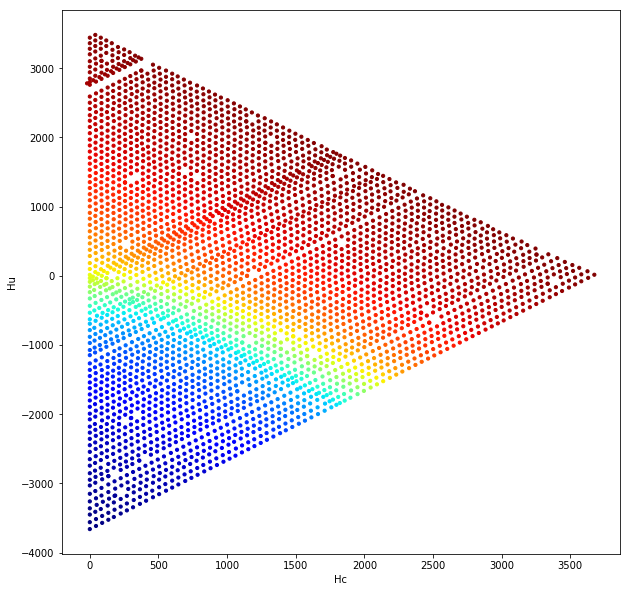

In [383]:
plt.figure(figsize=(10,10))
plt.scatter(Hc, Hu, s=10, c=M, cmap=cm.jet)
plt.xlabel( 'Hc')
plt.ylabel( 'Hu')
plt.show()

In [384]:
Halen, Hblen

(80, 81)

interpolate and plot raw forc

-20.0 3675.0 3320
-3660.0 3480.0 3320
3320
starting plotting figure 1 at 2.1959884550342395s ....


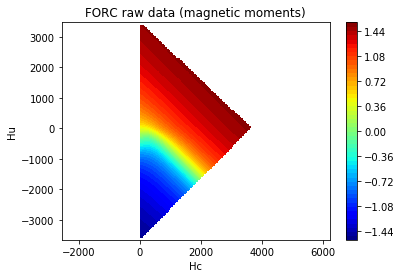

In [385]:
fdnp = np.array(fd[['Ha', 'Hb', 'Moment']])

#print( fd)

# plot raw forc data M( Ha, Hb)
x = Hc#fdnp[:, 0]#Hc
y = Hu#fdnp[:, 1]#Hu
z = fdnp[:, 2]
# define grid

minHu, maxHu = min(y), max( y)
minHc, maxHc = min(x), max( x)

#print(x,y,z)
print( minHc, maxHc, len(x))
print( minHu, maxHu, len(y))
print(len(z))

xi = np.linspace(minHc, maxHc, Hblen)
yi = np.linspace(minHu, maxHu, Halen)
# grid the data
#zi = griddata(x,y,z,xi,yi,interp='linear')  # linearly interpolate values to regular grid

f = interpolate.LinearNDInterpolator(list(zip(x,y)), z, fill_value=np.nan)  # bilinear
#f = interpolate.NearestNDInterpolator(fd[:, [1, 0]], z)  # nearest neighborhood
#f = interpolate.SmoothBivariateSpline( x, y, z, s=1, kx=3, ky=3)

#f2 = interpolate.interp2d( x, y, z, kind='linear', fill_value = np.nan)
#zi = f2(xi, yi)

xg, yg = np.meshgrid( xi, yi)
zi = f(xg, yg)

#print( 'finding bicubic spline representation...')
#tck = interpolate.bisplrep(x, y, z, s=0, kx=3, ky=3)  # bicubic splines
#print('interpolating spline to grid')
#zi = interpolate.bisplev(mg_xn[:,0], mg_yn[0,:], tck)  # gives always zero!?

# xi, yi, zi are regular gridded forc values

# contour the gridded data
start_time = timeit.default_timer()
print("starting plotting figure 1 at {}s ....".format(start_time - initial_time))
plt.contourf(xi,yi,zi,50,cmap=plt.cm.get_cmap("jet"))

#plt.imshow( zi, origin='lower', extent=(minHb, maxHb, minHa, maxHa), cmap='jet')
plt.colorbar() # draw colorbar
plt.xlabel( 'Hc')
plt.ylabel( 'Hu')
plt.title('FORC raw data (magnetic moments)')
plt.axis('equal')
plt.show()

use gridded data to test C++ FORC calculation

In [386]:
xi.shape, yi.shape, zi.shape

((81,), (80,), (80, 81))

In [387]:
zi

array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,     

In [388]:
FORC = np.empty( zi.shape, dtype=np.double)
FORC[:] = np.nan

In [389]:
FORC.shape

(80, 81)

In [390]:
calculateFORCHcHuFit( xg, yg, zi, zi.shape[1], zi.shape[0], FORC, 2)

In [391]:
FORC.shape

(80, 81)

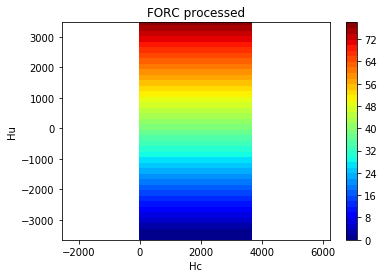

In [392]:
plt.contourf(xg, yg, FORC, 50, cmap=plt.cm.get_cmap("jet"))
#print(zi)
#plt.imshow( zi, origin='lower', extent=(minHb, maxHb, minHa, maxHa), cmap='RdBu')
plt.colorbar() # draw colorbar
plt.xlabel( 'Hc')
plt.ylabel( 'Hu')
plt.title( 'FORC processed')
plt.axis( 'equal')
plt.show()

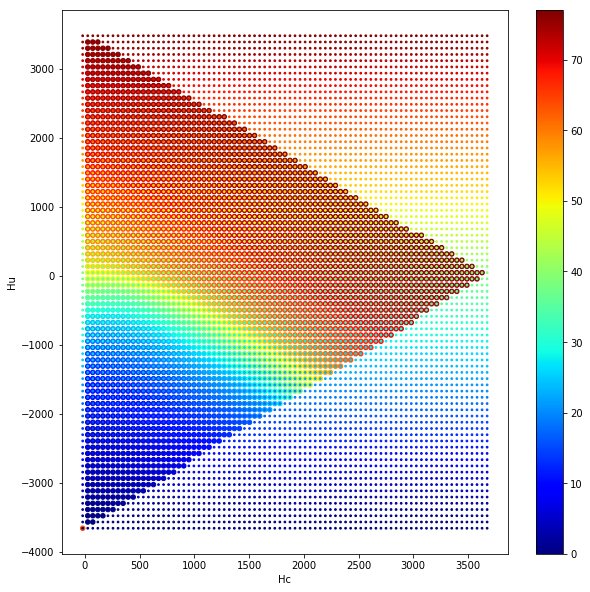

In [394]:
zi[0,0] = 1
plt.figure(figsize=(10,10))
#plt.scatter(xg, yg, s=12)
plt.scatter(xg, yg, s=20, c=zi, cmap=cm.jet)
plt.scatter(xg, yg, s=3, c=FORC, cmap=cm.jet)
plt.colorbar() # draw colorbar
plt.xlabel( 'Hc')
plt.ylabel( 'Hu')
plt.show()

In [8]:
# Release DLL
handle= lib._handle
_ctypes.FreeLibrary(handle)

starting data convolution at 65.84967995903838s ....
Seconds for data convolution: 0.0015947881162219346
starting plotting figure 2 at 65.85141216007406s ....
starting TranslateHaHbHcHu....
Seconds for TranslateHaHbHcHu: 0.0008330301885735025
starting gridding data at 66.09349153114482s ....
done
starting plotting figure 3 at 66.30303482989876s ....
finished after 66.53919518222318s total. showing plots.


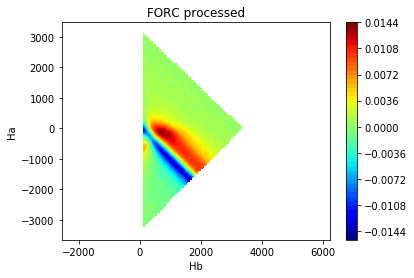

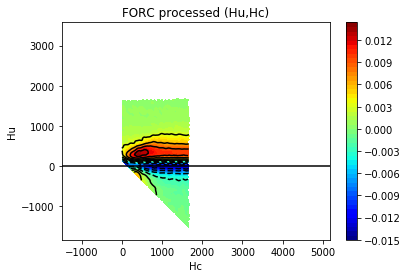

In [105]:
# now run convolution on regular gridded (interpolated) forc data
# define a kernel for differentiation in xy
#k = -np.array([[1, 0, -1],
#              [0, 0, 0],
#              [-1, 0, 1]])

k = -np.array([[1, 2, 0, -2, -1],
              [2, 4, 0, -4, -2],
              [0, 0, 0, 0, 0],
              [-2, -4, 0, 4, 2],
              [-1, -2, 0, 2, 1]])

k = k / np.absolute(k).sum() # normalize k to get right scaling of output


raw_forc = zi
#print(raw_forc.shape)

start_time = timeit.default_timer()
print("starting data convolution at {}s ....".format( start_time - initial_time))
conv_forc = ndimage.convolve(raw_forc, k, mode='reflect')
print("Seconds for data convolution: {}".format(timeit.default_timer() - start_time))

start_time = timeit.default_timer()
print("starting plotting figure 2 at {}s ....".format(start_time - initial_time))
plt.figure(2)
# contour the gridded data
plt.contourf(xi, yi, conv_forc, 50, cmap=plt.cm.get_cmap("jet"))
#print(zi)
#plt.imshow( zi, origin='lower', extent=(minHb, maxHb, minHa, maxHa), cmap='RdBu')
plt.colorbar() # draw colorbar
plt.xlabel( 'Hb')
plt.ylabel( 'Ha')
plt.title( 'FORC processed')
plt.axis( 'equal')

xv, yv = np.meshgrid(xi, yi)

print("starting TranslateHaHbHcHu....")
start_time = timeit.default_timer()
fittedFORCdata = FastTranslateHaHbHcHu(np.array([yv.flatten(), xv.flatten(), conv_forc.flatten()]).T)
print("Seconds for TranslateHaHbHcHu: {}".format(timeit.default_timer() - start_time))
#
x, y, z = fittedFORCdata[:, 0], fittedFORCdata[:, 1], fittedFORCdata[:, 2]
# # define grid
#
xi = np.linspace( 0, max(x), Halen*2) # Hc space
yi = np.linspace( min(y), max(y), Hblen*2) # Hu space

# # grid the data
start_time = timeit.default_timer()
print("starting gridding data at {}s ....".format(start_time - initial_time))
zi = griddata(x, y, z, xi, yi, interp='linear')
print("done")

start_time = timeit.default_timer()
print("starting plotting figure 3 at {}s ....".format(start_time - initial_time))
plt.figure(3)
# # contour the gridded data
cs = plt.contourf(xi, yi, zi, 50, cmap=plt.cm.get_cmap("jet"))
plt.contour(cs, levels=cs.levels[::5], colors='black')  # add contour lines
plt.axhline(0, color='black')
#plt.imshow( zi, origin='lower', extent=(minHb, maxHb, minHa, maxHa), cmap='RdBu')
plt.colorbar(cs)  # draw colorbar
# # plot data points.
plt.xlabel('Hc')
plt.ylabel('Hu')
# # show data points
# #plt.scatter( x, y)
plt.title('FORC processed (Hu,Hc)')
plt.axis('equal')
#
# #plt.xlim( [0, 0.1])
# #plt.ylim( [-0.1, 0.03])
# #plt.savefig( fname + '.png')

start_time = timeit.default_timer()
print("finished after {}s total. showing plots.".format(start_time - initial_time))

plt.show()
